# Sobre o Movie Lens

O MovieLens é um site com sistema de recomendação e comunidade virtal que recomenda filmes para seus usuários, baseado em suas preferências usando filtragem colaborativa de acordo com as notas e reviews que seus usuários colocam no site. O site contém cerca de 11 milhões de votos sobre 8500 filmes. 

Foi criado em 1997 pelo grupo de pesquisa GroupLens Research, um grupo de pesquisas no departamento de Ciências da Computação da Universidade de Minnesota. MovieLens usa o "filtro colabnorativo" para fazer recomendações que o usuário pode gostar, e também, para ajudar o usuário a evitar filmes que ele pode não gostar. Baseado nas avaliações do usuário, o MovieLens gera predições personalizadas de filmes não foi vistos pelo usuário. O MovieLens é base de pesquisa de centenas de estudantes que pesquisam os vários aspectos de tecnologias de personalização e filtragem.

Fonte:https://en.wikipedia.org/wiki/MovieLens

![title](images/MoviesLensFront2.png) 


# Sobre o TMDb

The Movie Database (conhecido como TMDb) é uma base de dados grátis e de código aberto sobre Filmes e Séries de TV. Criado por Travis Bell em 2008, a diferença para as outras base de dados, é que TMDb é atualizado constantemente pela comunidade.Era conhecido apenas por ser uma base de dados de filmes, mas em 2013 foi adicionado a parte de Séries de TV.

fonte: https://pt.wikipedia.org/wiki/The_Movie_Database
![title](images/TMDB.png) 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
%matplotlib inline 
from wordcloud import WordCloud
print('pandas:'+pd.__version__)
print('seaborn:'+sns.__version__)  

pandas:1.0.5
seaborn:0.10.1


In [2]:
movies = pd.read_csv('D:\\TCCDataScience\\dados\\movielens\\ml-25m\\movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
tmdb = pd.read_csv('D:\\TCCDataScience\\dados\\tmdb_5000_movies.csv')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
tmdb.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
 
from ast import literal_eval
tmdb['genres'] = tmdb['genres'].fillna('[]').apply(literal_eval).\
apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
tmdb['genres'] = ['|'.join(map(str, l)) for l in tmdb['genres']]
tmdb['year'] = pd.DatetimeIndex(tmdb['release_date']).year
tmdb[['genres','release_date','year']].head(3)

,genres,release_date,year
0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009.0
1,Adventure|Fantasy|Action,2007-05-19,2007.0
2,Action|Adventure|Crime,2015-10-26,2015.0


In [58]:
# # tmdb['genres'] = ['|'.join(map(str, l)) for l in tmdb['genres']]
# tmdb['year'] = pd.DatetimeIndex(tmdb['release_date']).year
# tmdb.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0


In [59]:
tmdb.duplicated().sum()

0

In [60]:
tmdb.shape

(4803, 21)

In [61]:
tmdb.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0


In [62]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [63]:
movies.duplicated().sum()

0

In [64]:
movies.shape

(62423, 3)

In [65]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [66]:
# for i, e in enumerate(movies['genres'][:5]):
#     print(i, e)

In [13]:
generos = movies.genres.str.get_dummies()
generos_tmdbb = tmdb.genres.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   (no genres listed)  62423 non-null  int64
 1   Action              62423 non-null  int64
 2   Adventure           62423 non-null  int64
 3   Animation           62423 non-null  int64
 4   Children            62423 non-null  int64
 5   Comedy              62423 non-null  int64
 6   Crime               62423 non-null  int64
 7   Documentary         62423 non-null  int64
 8   Drama               62423 non-null  int64
 9   Fantasy             62423 non-null  int64
 10  Film-Noir           62423 non-null  int64
 11  Horror              62423 non-null  int64
 12  IMAX                62423 non-null  int64
 13  Musical             62423 non-null  int64
 14  Mystery             62423 non-null  int64
 15  Romance             62423 non-null  int64
 16  Sci-Fi              62423 non-null  int6

In [15]:
generos.isin(['?']).count(axis=0)

C:\Users\USUARIO\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(no genres listed)    62423
Action                62423
Adventure             62423
Animation             62423
Children              62423
Comedy                62423
Crime                 62423
Documentary           62423
Drama                 62423
Fantasy               62423
Film-Noir             62423
Horror                62423
IMAX                  62423
Musical               62423
Mystery               62423
Romance               62423
Sci-Fi                62423
Thriller              62423
War                   62423
Western               62423
dtype: int64

In [16]:
generos_escolhidos = generos.apply(pd.Series.value_counts)[1:].transpose()
generos_escolhidos_tmdb = generos_tmdbb.apply(pd.Series.value_counts)[1:].transpose()

In [17]:
generos_escolhidos.reset_index(inplace=True)
generos_escolhidos_tmdb.reset_index(inplace=True) 

In [18]:
generos_escolhidos.columns = ['genero', 'frequencia']
generos_escolhidos_tmdb.columns = ['genero', 'frequencia']
# generos_escolhidos

In [19]:
generos_escolhidos.sort_values(by ='frequencia', ascending=False )[:10]

,genero,frequencia
8,Drama,25606
5,Comedy,16870
17,Thriller,8654
15,Romance,7719
1,Action,7348
11,Horror,5989
7,Documentary,5605
6,Crime,5319
0,(no genres listed),5062
2,Adventure,4145


In [20]:
d = {}
for a, x in generos_escolhidos.values:
    d[a] = x
d

{'(no genres listed)': 5062,
 'Action': 7348,
 'Adventure': 4145,
 'Animation': 2929,
 'Children': 2935,
 'Comedy': 16870,
 'Crime': 5319,
 'Documentary': 5605,
 'Drama': 25606,
 'Fantasy': 2731,
 'Film-Noir': 353,
 'Horror': 5989,
 'IMAX': 195,
 'Musical': 1054,
 'Mystery': 2925,
 'Romance': 7719,
 'Sci-Fi': 3595,
 'Thriller': 8654,
 'War': 1874,
 'Western': 1399}

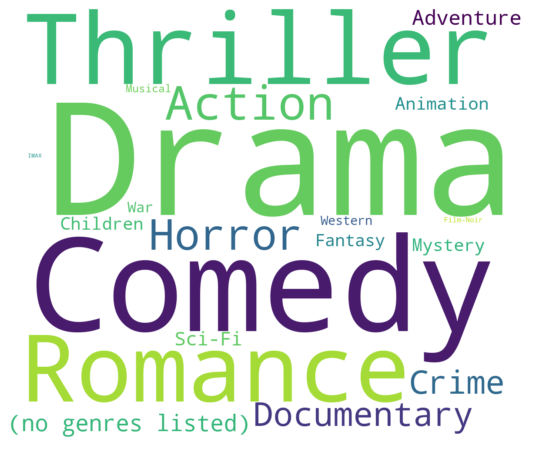

In [21]:
 

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize = (12, 8)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

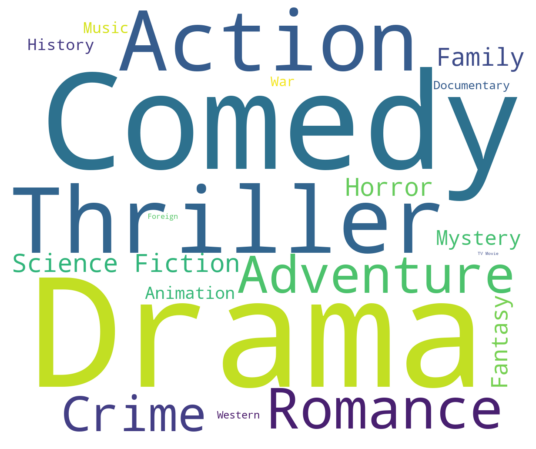

In [22]:
d = {}
for a, x in generos_escolhidos_tmdb.values:
    d[a] = x
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize = (12, 8)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
top_10 = generos_escolhidos.sort_values(by ='frequencia', ascending=False )[:10]
 

Text(0.5, 0, 'Gênero')

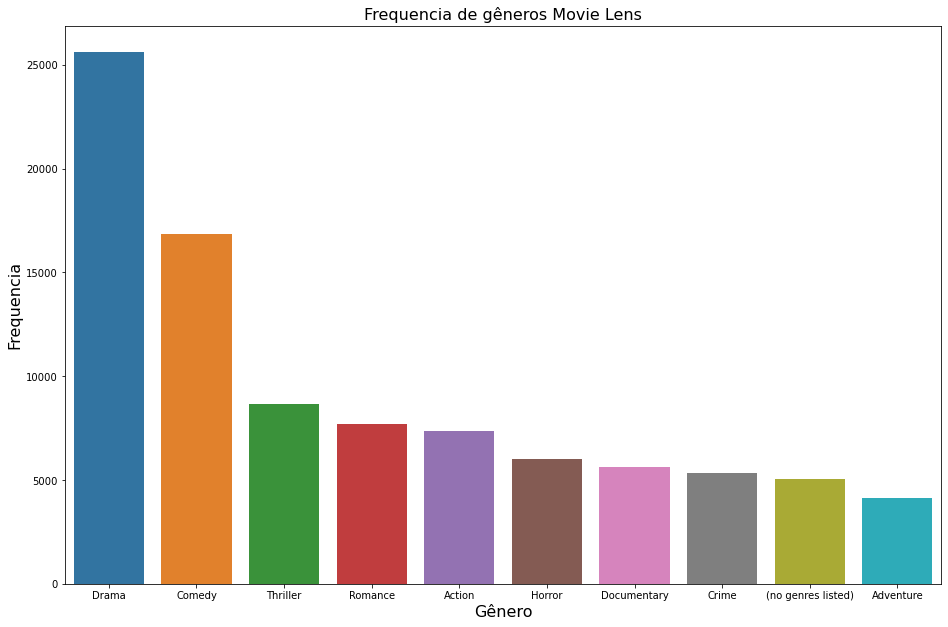

In [24]:


a4_dims = (15.7, 10.27) 
fig, ax = plt.subplots(figsize=a4_dims)   
sns.barplot(ax=ax, x='genero',y='frequencia',data=top_10 ) 
plt.title('Frequencia de gêneros Movie Lens', fontsize=16)
plt.ylabel('Frequencia', fontsize=16)
plt.xlabel('Gênero', fontsize=16)

Text(0.5, 0, 'Gênero')

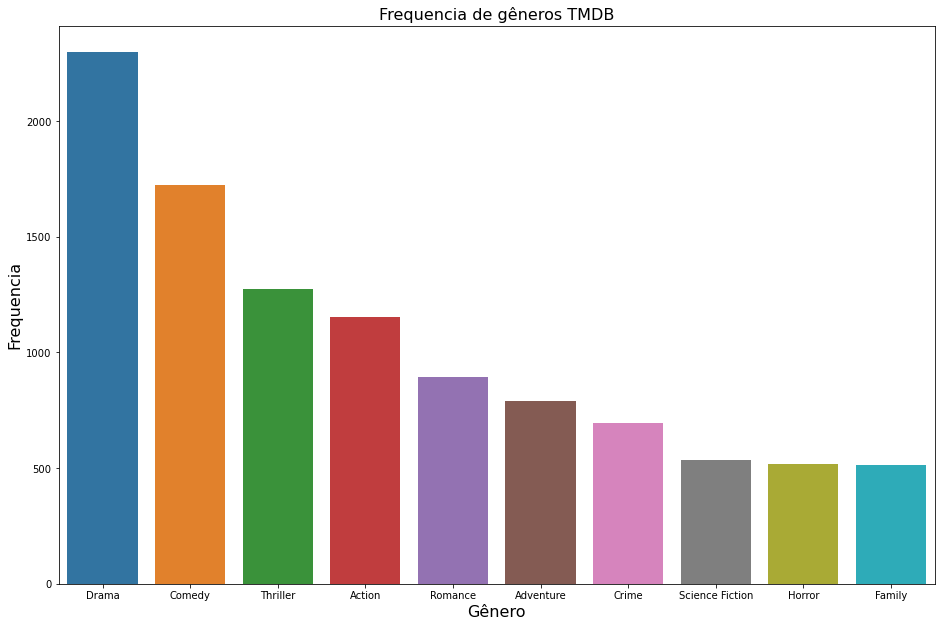

In [25]:
top_10 = generos_escolhidos_tmdb.sort_values(by ='frequencia', ascending=False )[:10]
 
a4_dims = (15.7, 10.27) 
fig, ax = plt.subplots(figsize=a4_dims) 
sns.barplot(ax=ax, x='genero',y='frequencia',data=top_10 ) 
plt.title('Frequencia de gêneros TMDB', fontsize=16)
plt.ylabel('Frequencia', fontsize=16)
plt.xlabel('Gênero', fontsize=16)  

 

In [27]:
notas = pd.read_csv("../../../dados/movielens/ml-25m/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [28]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [29]:
notas.shape

(25000095, 4)

In [30]:
notas.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


No dataset de notas do movieLens, não exite a nota média para cada filme. Vamos calculá-la 

In [31]:
average_vote = notas.groupby("movieId").mean()["rating"]
average_vote.head()

movieId
1    3.893708
2    3.251527
3    3.142028
4    2.853547
5    3.058434
Name: rating, dtype: float64

In [32]:
average_vote.shape

(59047,)

In [33]:
movies = movies.join(average_vote, on='movieId')

In [34]:
count_vote = notas.groupby("movieId").count()
count_vote = count_vote.drop('rating', 1)
count_vote = count_vote.drop('timestamp', 1)
count_vote.rename(columns={'userId':'qtd_votos'})
count_vote.columns = ['qtd_votos'] 
count_vote.head(3)

,qtd_votos
movieId,
1,57309
2,24228
3,11804


In [35]:
movies = movies.join(count_vote, on='movieId')
movies.head(3)

,movieId,title,genres,rating,qtd_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0


In [90]:
movies.to_csv("../../../dados/movielens/filmes_com_notas.csv")

In [91]:
#Filmes com as maiores notas
top_10_rated = movies.sort_values(by ='rating', ascending=False )[:10]
top_10_rated

,movieId,title,genres,rating,qtd_votos
30668,136782,The Girl is in Trouble (2015),Thriller,5.0,1.0
52812,186119,A Gift Horse (2015),Children,5.0,1.0
30790,137032,The Perfect Neighbor (2005),Drama|Thriller,5.0,1.0
52136,184643,Relentless (2018),Thriller,5.0,1.0
30793,137038,The Perfect Wife (2001),Drama|Thriller,5.0,1.0
57819,197231,The Harrow (2016),Crime|Drama|Mystery|Romance|Thriller,5.0,1.0
52147,184669,Devil's Whisper (2017),Horror,5.0,1.0
30798,137048,Perfect Child (2007),Drama,5.0,1.0
30799,137050,The Rival (2006),Thriller,5.0,1.0
30800,137052,A Job to Kill For (2006),Drama|Thriller,5.0,1.0


In [92]:
#Filmes com  as maiores notas
top_10_rated = movies.query("qtd_votos >= 50").sort_values(by ='rating', ascending=False )[:10]
top_10_rated

,movieId,title,genres,rating,qtd_votos
45741,171011,Planet Earth II (2016),Documentary,4.483096,1124.0
40597,159817,Planet Earth (2006),Documentary,4.464797,1747.0
314,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,81482.0
45593,170705,Band of Brothers (2001),Action|Drama|War,4.398599,1356.0
45973,171495,Cosmos,(no genres listed),4.326715,277.0
840,858,"Godfather, The (1972)",Crime|Drama,4.324336,52498.0
49559,179135,Blue Planet II (2017),Documentary,4.289833,659.0
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.284353,55366.0
58237,198185,Twin Peaks (1989),Drama|Mystery,4.267361,288.0
1190,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.261759,34188.0


In [93]:
tags = pd.read_csv("D:\\TCCDataScience\\dados\\movielens\\ml-25m\\tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


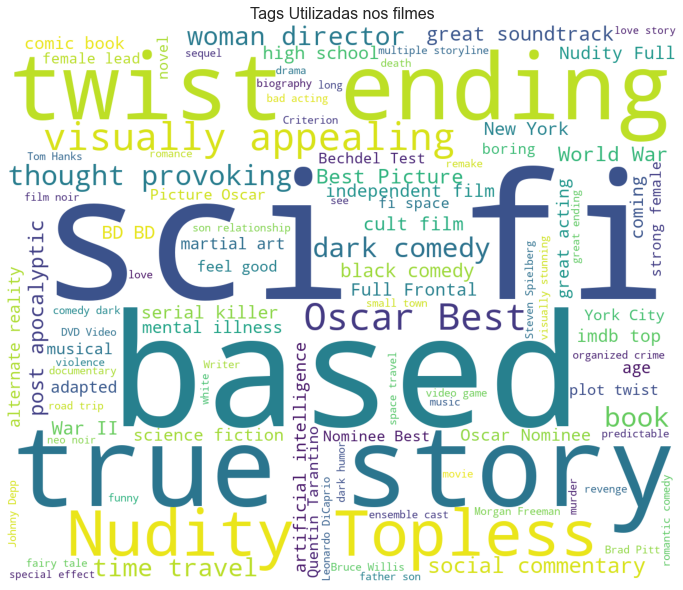

In [94]:
plt.figure(figsize = (12, 12))
text = ' '.join(tags['tag'].fillna('').values)
wordcloud = WordCloud(max_words=100,
                      max_font_size=None, 
                      background_color='white', 
                      width=1200, 
                      height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Tags Utilizadas nos filmes', fontsize=16) 
plt.axis("off")
plt.show()

## Palavras chave mais utilizadas

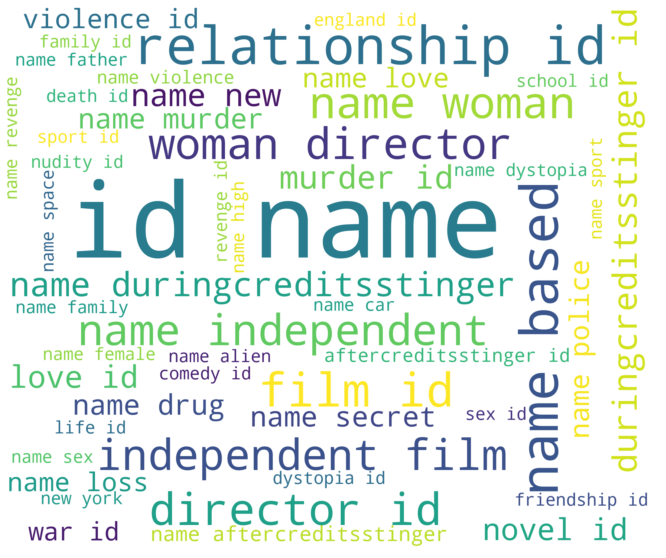

In [95]:
text = ','.join(tmdb['keywords'].str.cat(sep='|').split('|'))
wc = WordCloud(max_words=50,
#                colormap='coolwarm',
              background_color='white',
               max_font_size=None, 
               scale=1.8,
               font_step=4,
               width=1200,
               height=1000
              ).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Qual o ano com mais filmes segundo TMDB?

In [96]:
top_20_years = tmdb['year'].value_counts().to_frame()
top_20_years.head()
top_20_years.reset_index(inplace=True) 
top_20_years.columns = ['year', 'frequencia']
top_20_years.describe()
top_20_years = top_20_years.sort_values(by ='frequencia', ascending=False )[:10]
d = {}
for a, x in top_20_years.values:
    d[a] = x
d

{2009.0: 247.0,
 2014.0: 238.0,
 2006.0: 237.0,
 2013.0: 231.0,
 2008.0: 227.0,
 2010.0: 225.0,
 2011.0: 223.0,
 2005.0: 217.0,
 2015.0: 216.0,
 2012.0: 208.0}

 
#### Qual foi ano ano com mais filmes lançados

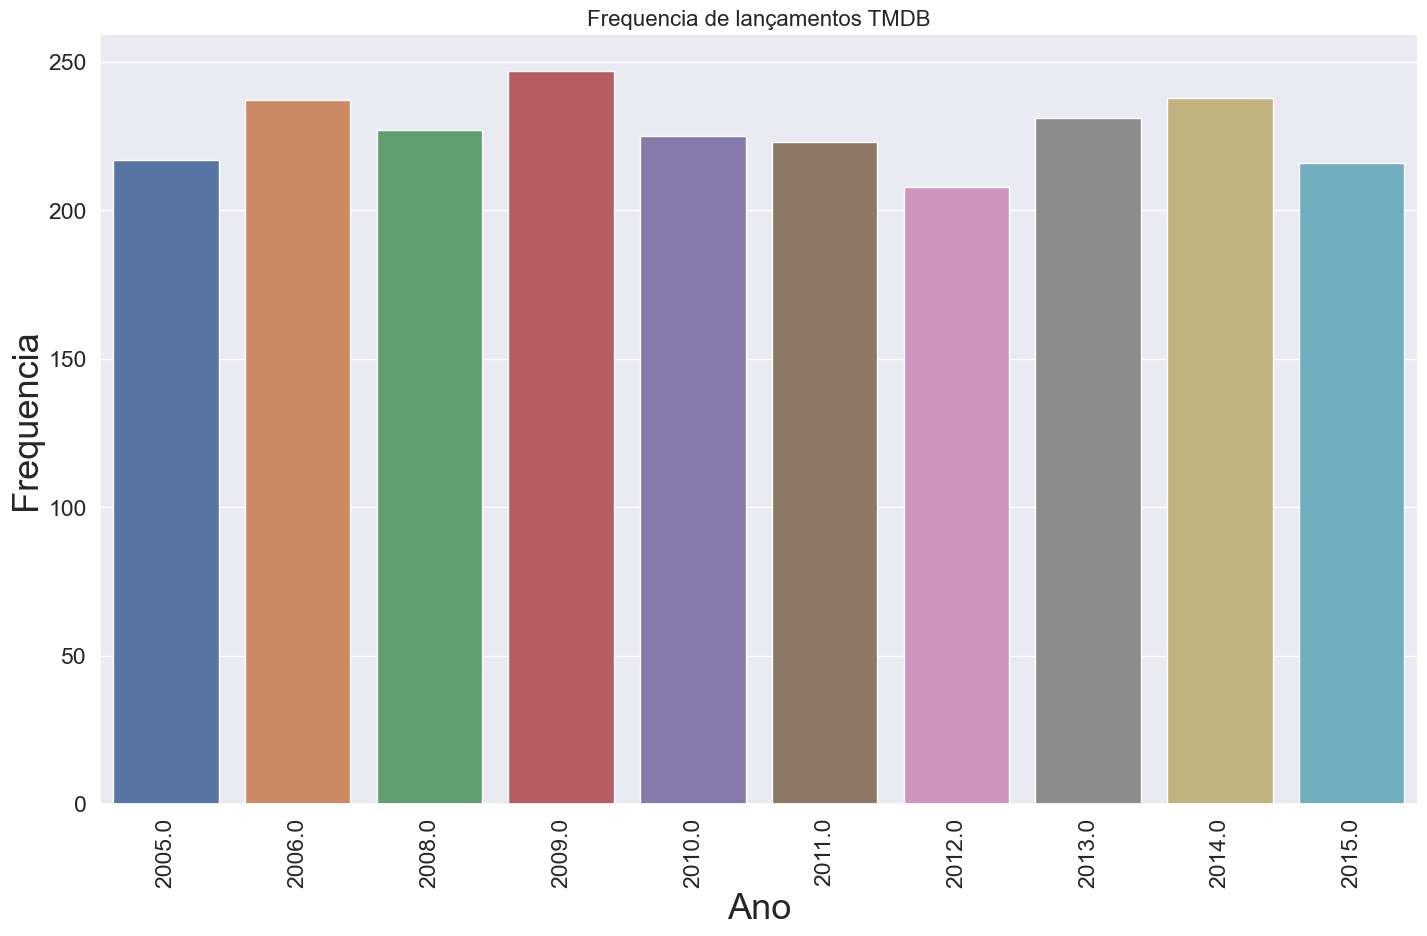

In [113]:
temp = list(set(list(tmdb.year)).intersection(set(list(top_20_years.year))))
df =  tmdb[tmdb.year.isin(temp)] 
st = sns.axes_style("whitegrid")
sns.set(font_scale=1.5)
sns.set_style("ticks", {"axes.labelsize": 18,"axes.titlesize":20, "ytick.major.size": 18,"axes.labelsize":20})
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(17,10))
    sns.countplot(df['year'] )
    sns.set_style("ticks")
    plt.xticks(rotation = 90)
    plt.title('Frequencia de lançamentos TMDB', fontsize=16)
    plt.ylabel('Frequencia', fontsize=26)
    plt.xlabel('Ano', fontsize=26)
    plt.show()

#### Qual foi o filme com mais e com menos lucros? Quais os 10 filmes que tiveram mais lucro?

In [98]:
tmdb['profit'] = tmdb['revenue'] - tmdb['budget']
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,2550965087
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,661000000
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,635674609
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,834939099
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,24139100


In [99]:
print(sns.__version__)

0.10.1


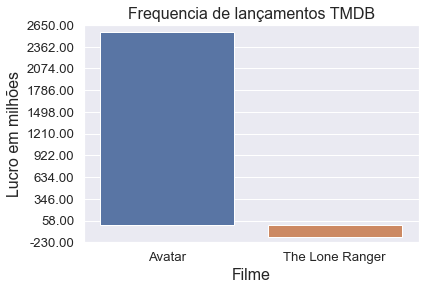

In [148]:
dd = tmdb[(tmdb.profit == tmdb['profit'].max()) | (tmdb.profit == tmdb['profit'].min())][['original_title','profit']]
# # sns.reset_defaults()
# a4_dims = (15.7, 10.27) 
# sns.set_style('whitegrid')
# sns.set(font_scale=1.2)
# sns.set_style("ticks", {"axes.labelsize": 18,"axes.titlesize":20, "ytick.major.size": 18,"axes.labelsize":20})
fig, ax = plt.subplots()
ax.set_ylim(-2300000000,2650000000)
ax.yaxis.set_minor_locator(plt.LinearLocator( ))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1000000)))
ax.yaxis.set_major_locator(plt.LinearLocator( ))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter())
sns.barplot(dd['original_title'],dd['profit'])
plt.ylim(-230000000,2650000000) 
plt.title('Frequencia de lançamentos TMDB', fontsize=16)
plt.ylabel('Lucro em milhões', fontsize=16)
plt.xlabel('Filme', fontsize=16)

# with sns.axes_style("darkgrid"):
#     plt.figure(figsize=(17,10))
#     sns.set_style("ticks") 
#     sns.barplot(ax=ax, x='original_title',y='profit',data=dd )   
    
#     plt.title('Frequencia de lançamentos TMDB', fontsize=16)
#     plt.ylabel('Frequencia', fontsize=26)
#     plt.xlabel('Ano', fontsize=26)
#    
#     
plt.show()
# sns.barplot(dd['original_title'],dd['profit'])
# fig, ax = plt.subplots()

# sns.barplot(dd['original_title'],dd['profit'], ax=ax)
# ax.set_ylim(-200000000,2650000000)
# sns.set(font_scale=0.8)
# # ax.set_yticks(range(-166000000,2550000000))
# plt.show()
 

Conferir as maiores bilheterias: https://www.omelete.com.br/marvel-cinema/vingadores-ultimato-endgame/vingadores-ultimato-10-maiores-bilheterias-da-historia#20

In [109]:
dd

,original_title,profit
0,Avatar,2550965087
13,The Lone Ranger,-165710090


#### Qual o filme com maior orçamento? E o menor?

In [160]:
from sklearn.preprocessing import MinMaxScaler
db = tmdb[(tmdb.budget == tmdb['budget'].max()) | (tmdb.budget == tmdb.query('budget > 10 ')['budget'].min())][['original_title','budget']]
db['scaled_budget'] = MinMaxScaler().fit_transform(db['budget'].values.reshape(-1,1))
db 


,original_title,budget,scaled_budget
17,Pirates of the Caribbean: On Stranger Tides,380000000,1.0
2933,F.I.S.T.,11,0.0


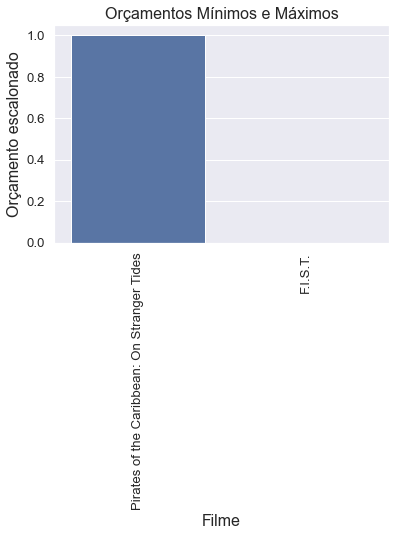

In [161]:
fig, ax = plt.subplots() 
# ax.yaxis.set_minor_locator(plt.LinearLocator( ))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1000000)))
# ax.yaxis.set_major_locator(plt.LinearLocator( ))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter())
sns.barplot(db['original_title'],db['scaled_budget']) 
plt.title('Orçamentos Mínimos e Máximos', fontsize=16)
plt.ylabel('Orçamento escalonado', fontsize=16)
plt.xlabel('Filme', fontsize=16)
plt.xticks(rotation = 90)
# with sns.axes_style("darkgrid"):
#     plt.figure(figsize=(17,10))
#     sns.set_style("ticks") 
#     sns.barplot(ax=ax, x='original_title',y='profit',data=dd )   
    
#     plt.title('Frequencia de lançamentos TMDB', fontsize=16)
#     plt.ylabel('Frequencia', fontsize=26)
#     plt.xlabel('Ano', fontsize=26)
#    
#     
plt.show()

#### Qual o filme com maior retorno financeiro? E o menor?

In [162]:
dr = tmdb[(tmdb.revenue == tmdb['revenue'].max()) | (tmdb.revenue == tmdb.query('revenue > 10 ')['revenue'].min())][['original_title','revenue']]
dr['scaled_revenue'] = MinMaxScaler().fit_transform(dr['revenue'].values.reshape(-1,1))
dr

,original_title,revenue,scaled_revenue
0,Avatar,2787965087,1.0
2933,F.I.S.T.,11,0.0
3131,Hross í oss,11,0.0


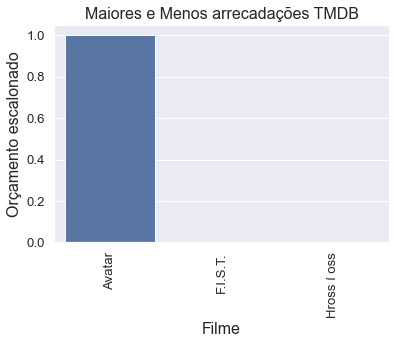

In [164]:
fig, ax = plt.subplots() 
# ax.yaxis.set_minor_locator(plt.LinearLocator( ))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1000000)))
# ax.yaxis.set_major_locator(plt.LinearLocator( ))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter())
sns.barplot(dr['original_title'],dr['scaled_revenue']) 
plt.title('Maiores e Menos arrecadações TMDB', fontsize=16)
plt.ylabel('Orçamento escalonado', fontsize=16)
plt.xlabel('Filme', fontsize=16)
plt.xticks(rotation = 90)
# with sns.axes_style("darkgrid"):
#     plt.figure(figsize=(17,10))
#     sns.set_style("ticks") 
#     sns.barplot(ax=ax, x='original_title',y='profit',data=dd )   
    
#     plt.title('Frequencia de lançamentos TMDB', fontsize=16)
#     plt.ylabel('Frequencia', fontsize=26)
#     plt.xlabel('Ano', fontsize=26)
#    
#     
plt.show()

#### Qual o filme com maior duração? E o filme com a menor?

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

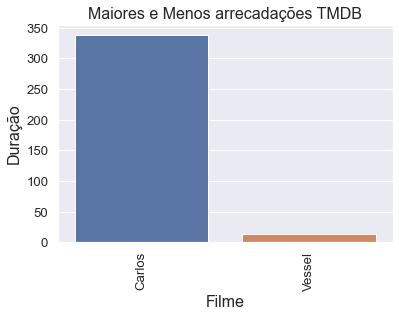

In [171]:
dd = tmdb[(tmdb.runtime == tmdb['runtime'].max()) | (tmdb.runtime == tmdb.query('runtime > 10 ')['runtime'].min())][['original_title','runtime']]
# sns.barplot(dd['original_title'],dd:['runtime'])
dd
fig, ax = plt.subplots() 
# ax.yaxis.set_minor_locator(plt.LinearLocator( ))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x/1000000)))
# ax.yaxis.set_major_locator(plt.LinearLocator( ))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter())
sns.barplot(dd['original_title'],dd['runtime']) 
plt.title('Maiores e Menos arrecadações TMDB', fontsize=16)
plt.ylabel('Duração', fontsize=16)
plt.xlabel('Filme', fontsize=16)
plt.xticks(rotation = 90)

#### Qual a duração média dos filmes ao longo dos anos?

In [188]:
tempdf = tmdb.query('runtime > 10 ').groupby('year')['runtime'].mean()
tempdf = tempdf.to_frame()
tempdf.reset_index(inplace=True) 
tempdf.head()

,year,runtime
0,1916.0,197.0
1,1925.0,151.0
2,1927.0,153.0
3,1929.0,104.5
4,1930.0,127.0


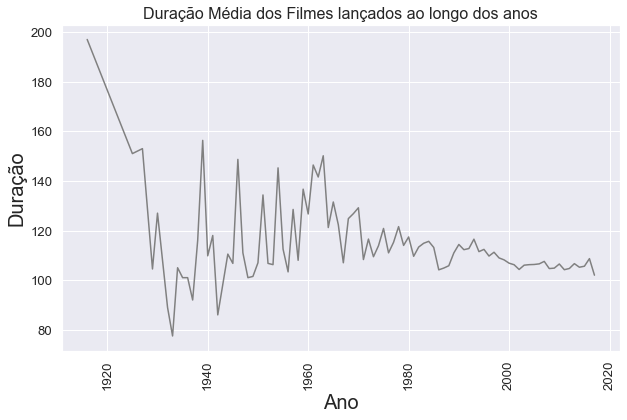

In [194]:
plt.figure(figsize=(10,6))

sns.lineplot(tempdf['year'],tempdf['runtime'],color='grey')
plt.title('Duração Média dos Filmes lançados ao longo dos anos', fontsize=16)
plt.ylabel('Duração', fontsize=20)
plt.xlabel('Ano', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

#### Retorno financeiro tem a ver com orçamento ou tempo do filme?

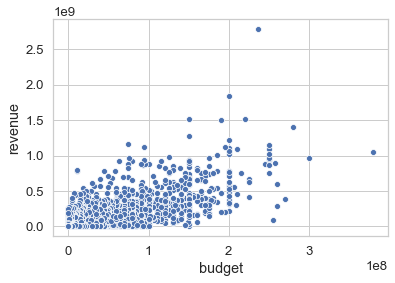

In [201]:
sns.scatterplot(tmdb['budget'],tmdb['revenue'])
sns.set_style("whitegrid") 
plt.show()

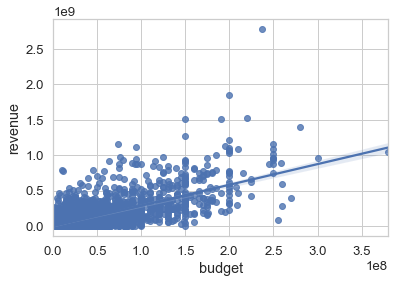

In [200]:
sns.regplot('budget','revenue',data=tmdb)
plt.show()

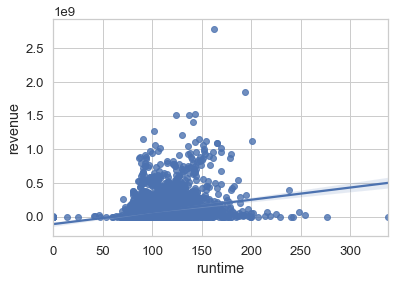

In [205]:
sns.regplot('runtime','revenue',data=tmdb )
plt.show()

O tempo de duração não tem muito a ver com o retorno financeiro

#### Qual o efeito do orçamento, tempo de duração e lucros com a popularidade 

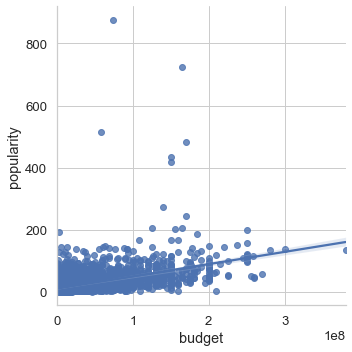

In [207]:
sns.lmplot('budget','popularity',data=tmdb)
sns.set_style("darkgrid")
plt.show()

O custo é relacionado com a popularidade

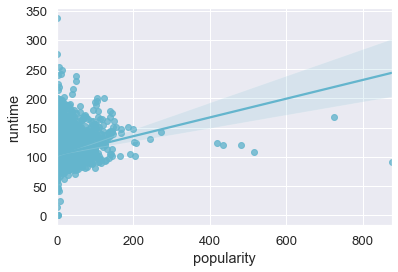

In [209]:
sns.regplot(tmdb['popularity'],tmdb['runtime'],color='c')
plt.show()

Aparentemente a popularidade é pouco afetada pelo tempo de duração do filme

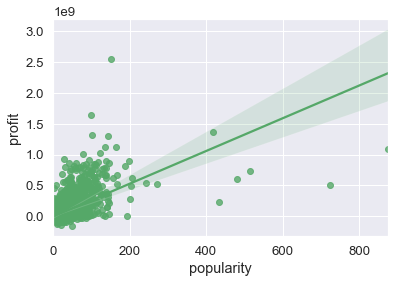

In [210]:
sns.regplot(tmdb['popularity'],tmdb['profit'],color='g')
plt.show()

Popularidade tem alta relação com o retorno financeiro

In [213]:
generos_tmdb = tmdb['genres'].str.get_dummies(sep='|')
generos_tmdb.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


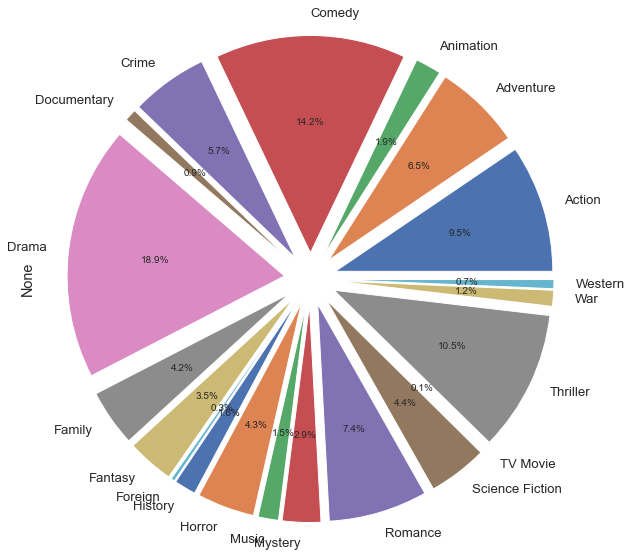

In [214]:
generos_tmdb[generos_tmdb.columns].apply(lambda x: sum(x.values)).plot.pie(figsize=(20,10),autopct='%1.1f%%',explode=[0.12]*len(generos_tmdb.columns))
plt.show()
